In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.shape

(5172, 3002)

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

In [6]:
x.shape

(5172, 3000)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


In [8]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [9]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

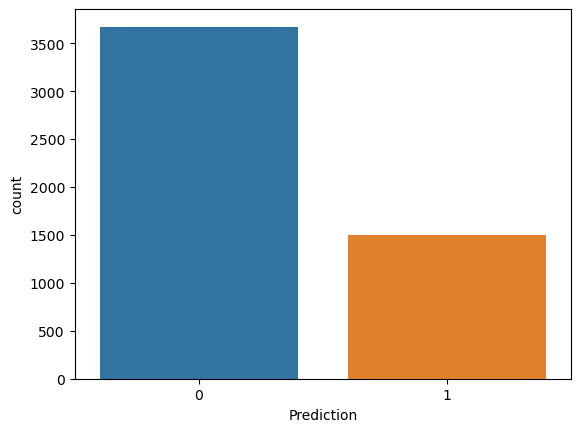

In [10]:
import seaborn as sns
sns.countplot(x=y)

In [16]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)

In [24]:
x_scaled.shape

(5172, 3000)

In [25]:
x_train.shape

(3879, 3000)

In [26]:
x_test.shape

(1293, 3000)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors =5)
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred =Knn.predict(x_test)

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

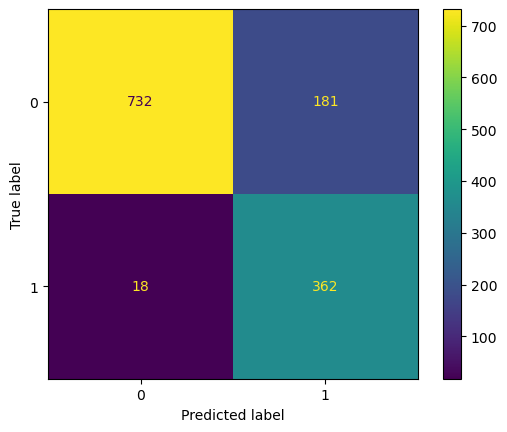

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [36]:
y_test.value_counts()

Prediction
0    913
1    380
Name: count, dtype: int64

In [37]:
accuracy_score(y_test,y_pred)

0.8460943542150039

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       913
           1       0.67      0.95      0.78       380

    accuracy                           0.85      1293
   macro avg       0.82      0.88      0.83      1293
weighted avg       0.89      0.85      0.85      1293



In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
error =[]
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors =k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_pred != y_test))

In [43]:
error

[0.09667440061871617,
 0.09976798143851508,
 0.1368909512761021,
 0.12219644238205724,
 0.15390564578499613,
 0.14153132250580047,
 0.16318638824439288,
 0.1608662026295437,
 0.17865429234338748,
 0.17324052590873937,
 0.19876256767208042,
 0.19412219644238204,
 0.21191028615622584,
 0.21191028615622584,
 0.22892498066511988,
 0.22505800464037123,
 0.23897911832946636,
 0.23820572312451663,
 0.2529002320185615,
 0.2505800464037123,
 0.26063418406805877,
 0.25986078886310904,
 0.27068832173240526,
 0.27068832173240526,
 0.2861562258313998,
 0.2846094354215004,
 0.29311678267594743,
 0.2907965970610982,
 0.3039443155452436,
 0.30162412993039445,
 0.3139984532095901,
 0.30935808197989173,
 0.3163186388244393,
 0.3147718484145398,
 0.3225058004640371,
 0.3209590100541377,
 0.32405259087393656,
 0.32327919566898683,
 0.32869296210363497,
 0.3248259860788863]

In [44]:
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
y_pred = knn.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred)

0.9033255993812839

In [47]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred =svm.predict(x)

In [49]:
accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1293, 3879]